## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


8219 rows and 4 columns. Object, int, float, float

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df= gdp_df.drop(["Value Footnotes"], axis=1)

In [7]:
gdp_df=gdp_df.rename(columns={"Country or Area":"Country", "Value":"GDP_Per_Capita"})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


In [9]:
gdp_df['Year'].nunique()

34

In [10]:
gdp_df_Year_Count=gdp_df.groupby(['Country']).count().sort_values(by='Year')

In [11]:
gdp_df_Year_Count[gdp_df_Year_Count['Year']>33]

,Year,GDP_Per_Capita
Country,,
Peru,34,34
Netherlands,34,34
New Zealand,34,34
Nicaragua,34,34
Niger,34,34
...,...,...
Heavily indebted poor countries (HIPC),34,34
High income,34,34
Honduras,34,34


In [12]:
gdp_df_Year_Count[gdp_df_Year_Count['Year']<34]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Faroe Islands,16,16
Kosovo,16,16
Cayman Islands,18,18
Virgin Islands,21,21
CuraÃ§ao,24,24
Afghanistan,24,24


In [13]:
gdp_df_Year_Count['Year'].value_counts().sort_index()

Year
11      1
13      1
15      1
16      2
18      1
21      1
24      2
26      1
27      1
29      1
30      1
32      1
33      5
34    228
Name: count, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

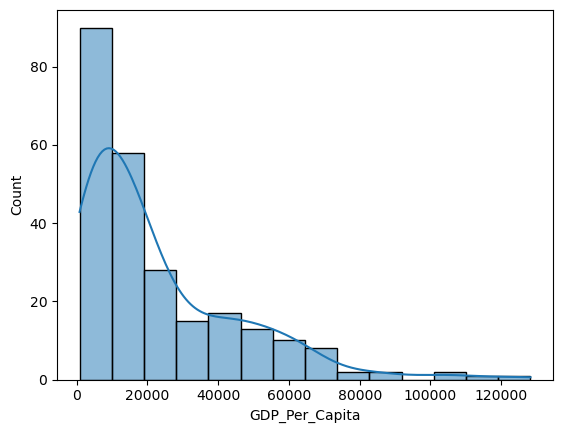

In [14]:
gdp_df_2020= gdp_df[gdp_df['Year'] == 2020]
sns.histplot(gdp_df_2020['GDP_Per_Capita'], kde=True)
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

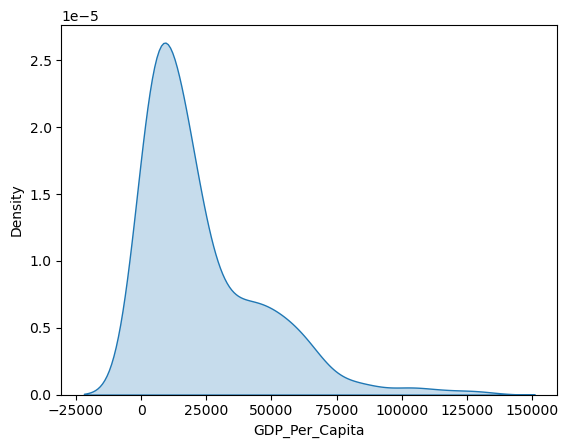

In [15]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], fill=True)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

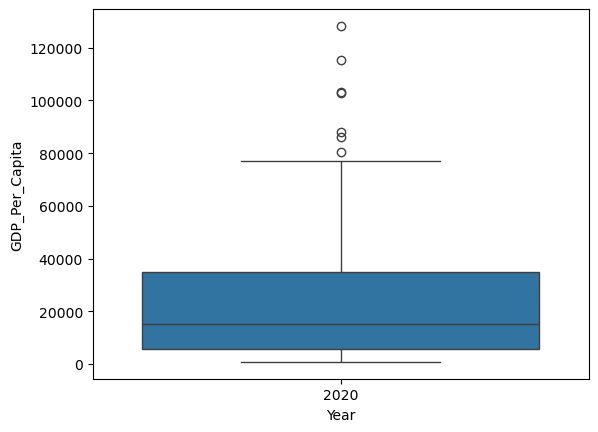

In [16]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_df_2020)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

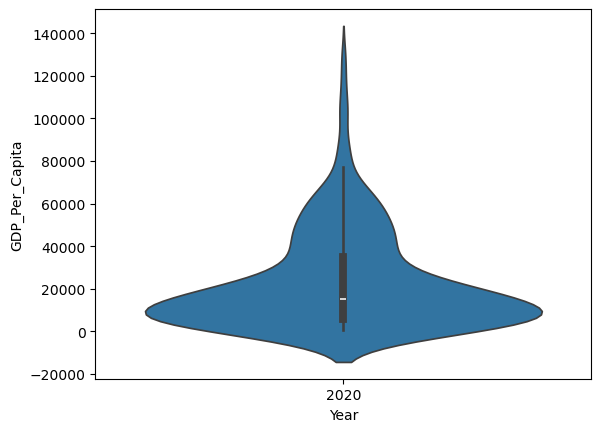

In [17]:
sns.violinplot(x='Year', y='GDP_Per_Capita', data=gdp_df_2020)

9. What was the median GDP per capita value in 2020?

In [18]:
gdp_df_2020['GDP_Per_Capita'].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [19]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

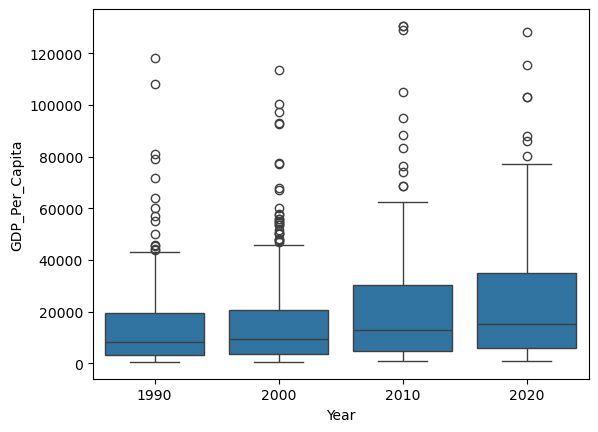

In [20]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

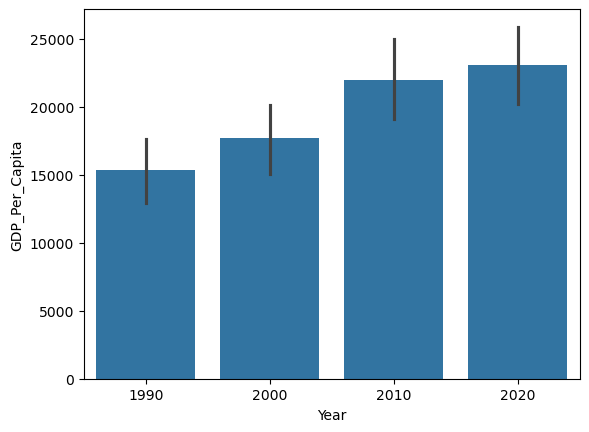

In [21]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

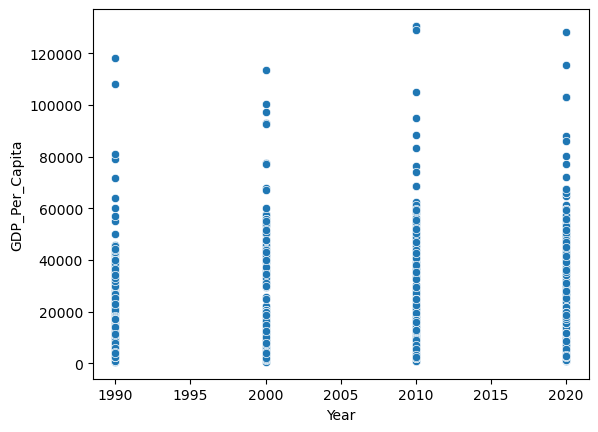

In [22]:
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

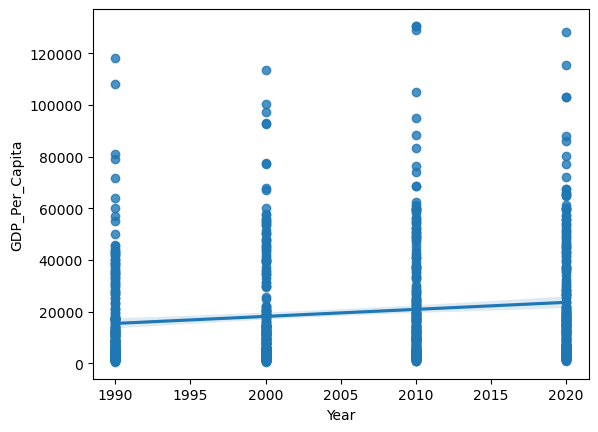

In [23]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

All of the charts show the range of gdp's. There is an overall growth trend through the years and the scatterplot charts do a better job of showing the specific outliers, where the bar charts show just how far the outliers go, but not how many instances. 

11. Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
gdp_100k=gdp_df[gdp_df['GDP_Per_Capita'] >= 100000]

In [25]:
gdp_100k_country=gdp_100k.groupby('Country')['Year'].min().sort_values()

In [26]:
print(gdp_100k_country)

Country
Brunei                  1990
United Arab Emirates    1990
Luxembourg              1998
Bermuda                 2001
Qatar                   2004
Macao SAR, China        2007
Singapore               2012
Ireland                 2020
Name: Year, dtype: int64


Brunei and UAE

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [27]:
gdp_df_2020['GDP_Per_Capita'].max()

128256.5603407562

In [28]:
gdp_df_2020.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341
6514,Singapore,2020,115304.149459
6119,Qatar,2020,103061.913414
3493,Ireland,2020,102989.787335
741,Bermuda,2020,87894.401174
...,...,...,...
5133,Mozambique,2020,1466.124765
6699,Somalia,2020,1396.053436
1734,Dem. Rep. Congo,2020,1277.632863
1302,Central African Republic,2020,1136.570530


Luxembourg

In [29]:
country_2020=gdp_df[gdp_df['Country'] == 'Luxembourg']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

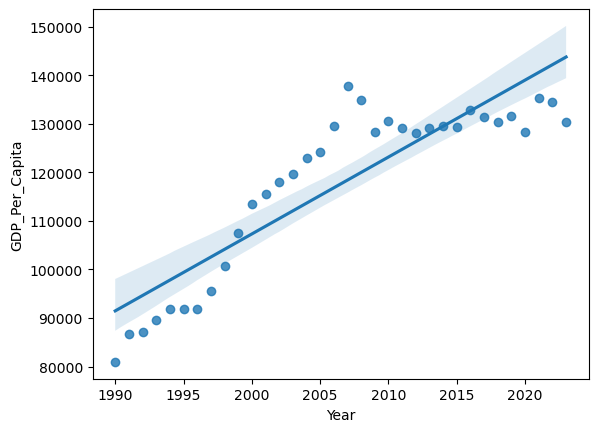

In [30]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=country_2020)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Burundi

In [31]:
lowgdp=gdp_df[gdp_df['Country'] == 'Burundi']

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

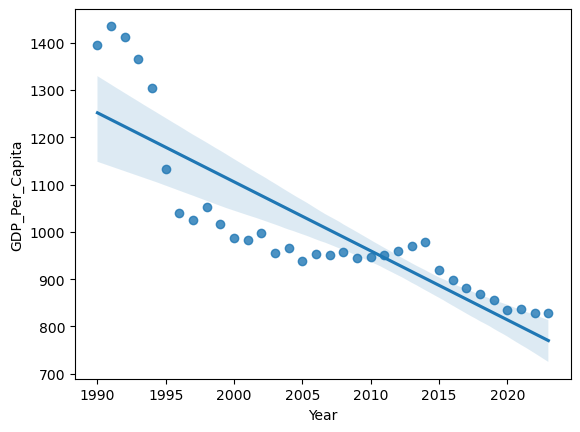

In [32]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=lowgdp)

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [33]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=6083)

In [34]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


In [35]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [36]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [37]:
internet_df= internet_df.drop(["Value Footnotes"], axis=1)

In [38]:
internet_df=internet_df.rename(columns={"Country or Area":"Country", "Value":"Internet_Users_Pct"})

In [39]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739
6082     Zimbabwe  1990            0.000000

[6083 rows x 3 columns]


16. Look at the number of observations in this dataset per year. What do you notice?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

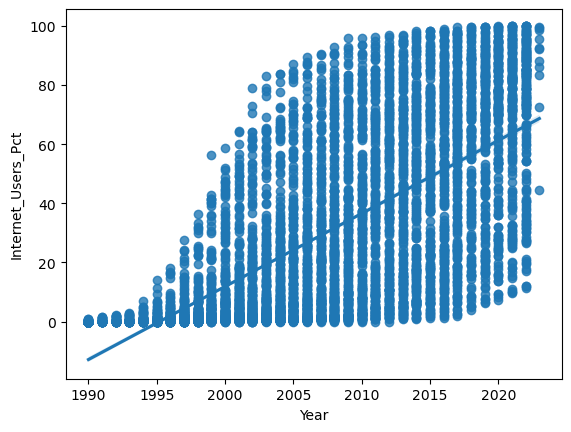

In [40]:
sns.regplot(x='Year', y='Internet_Users_Pct', data=internet_df)

17. What is the first year to have a non-zero internet users percentage value?

In [41]:
first_internet=internet_df[(internet_df['Year'] == 1990) & (internet_df['Internet_Users_Pct'] > 0)]

In [42]:
print(first_internet)

                           Country  Year  Internet_Users_Pct
306                      Australia  1990            0.585095
339                        Austria  1990            0.130369
543                        Belgium  1990            0.001007
1010                        Canada  1990            0.361000
1570                       Denmark  1990            0.097277
2001                       Finland  1990            0.401088
2034                        France  1990            0.052778
2192                       Germany  1990            0.125892
2796                        Israel  1990            0.110774
2829                         Italy  1990            0.017545
2892                         Japan  1990            0.020294
3054          Korea (Republic  of)  1990            0.023265
3980  Netherlands (Kingdom of the)  1990            0.334387
4197                        Norway  1990            0.707299
5150                         Spain  1990            0.012874
5299                    

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [43]:
internet_dis= internet_df[internet_df['Year'].isin([2000, 2014])]

In [50]:
pivot=internet_dis.pivot(index='Country', columns='Year', values='Internet_Users_Pct')

In [51]:
print(pivot)

Year                      2000     2014
Country                                
Afghanistan                NaN   7.0000
Albania               0.114097  54.3000
Algeria               0.491706  29.5000
Andorra              10.538800  86.1000
Angola                0.105046  21.3623
...                        ...      ...
Virgin Islands (US)  13.815100  50.0700
Wallis and Futuna     4.768070      NaN
Yemen                 0.082500  22.5500
Zambia                0.191072   6.5000
Zimbabwe              0.401434  16.3647

[219 rows x 2 columns]


Almost all of the countries saw a large increase in internet usage